# Patient Survival Detection Deep Learning Model

## Import Libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# from impyute.imputation.cs import fast_knn
from sklearn.model_selection import train_test_split
# from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

# imputer = KNNImputer(n_neighbors=2)
imputer = SimpleImputer(strategy='most_frequent')
sns.set_style('darkgrid')
%matplotlib inline

In [2]:
df = pd.read_csv('../Datasets/Dataset.csv')
df.shape

(91713, 186)

## EDA

In [3]:
df.head()

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.73,0,Caucasian,M,180.3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.42,0,Caucasian,F,160.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,119783,50777,118,0,25.0,31.95,0,Caucasian,F,172.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
3,79267,46918,118,0,81.0,22.64,1,Caucasian,F,165.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
4,92056,34377,33,0,19.0,NaN,0,Caucasian,M,188.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Columns: 186 entries, encounter_id to apache_2_bodysystem
dtypes: float64(170), int64(8), object(8)
memory usage: 130.1+ MB


In [5]:
df.dtypes[df.dtypes=='object']

ethnicity                object
gender                   object
hospital_admit_source    object
icu_admit_source         object
icu_stay_type            object
icu_type                 object
apache_3j_bodysystem     object
apache_2_bodysystem      object
dtype: object

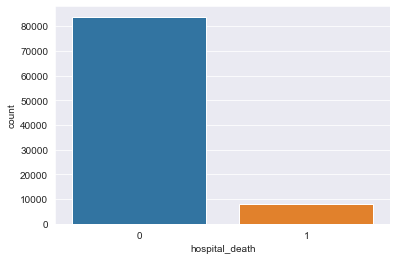

([<matplotlib.patches.Wedge at 0x7fb902b12790>,
 [Text(-1.0598172020063896, 0.29459717977493893, 'Survived'),
  Text(1.0598172295885635, -0.2945970805476902, 'Did not survive')])

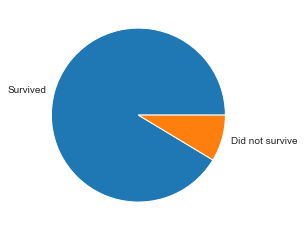

In [6]:
sns.countplot(x=df['hospital_death'])
plt.show()
plt.pie(df['hospital_death'].value_counts(), labels=['Survived', 'Did not survive'])

In [7]:
df.describe(include='object').T

,count,unique,top,freq
ethnicity,90318,6,Caucasian,70684
gender,91688,2,M,49469
hospital_admit_source,70304,15,Emergency Department,36962
icu_admit_source,91601,5,Accident & Emergency,54060
icu_stay_type,91713,3,admit,86183
icu_type,91713,8,Med-Surg ICU,50586
apache_3j_bodysystem,90051,11,Cardiovascular,29999
apache_2_bodysystem,90051,10,Cardiovascular,38816


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
encounter_id,91713.0,65606.079280,37795.088538,1.0,32852.0,65665.0,98342.0,131051.0
patient_id,91713.0,65537.131464,37811.252183,1.0,32830.0,65413.0,98298.0,131051.0
hospital_id,91713.0,105.669262,62.854406,2.0,47.0,109.0,161.0,204.0
hospital_death,91713.0,0.086302,0.280811,0.0,0.0,0.0,0.0,1.0
age,87485.0,62.309516,16.775119,16.0,52.0,65.0,75.0,89.0
...,...,...,...,...,...,...,...,...
hepatic_failure,90998.0,0.012989,0.113229,0.0,0.0,0.0,0.0,1.0
immunosuppression,90998.0,0.026165,0.159628,0.0,0.0,0.0,0.0,1.0
leukemia,90998.0,0.007066,0.083763,0.0,0.0,0.0,0.0,1.0
lymphoma,90998.0,0.004132,0.064148,0.0,0.0,0.0,0.0,1.0


In [9]:
df.select_dtypes(include='object').columns

Index(['ethnicity', 'gender', 'hospital_admit_source', 'icu_admit_source',
       'icu_stay_type', 'icu_type', 'apache_3j_bodysystem',
       'apache_2_bodysystem'],
      dtype='object')

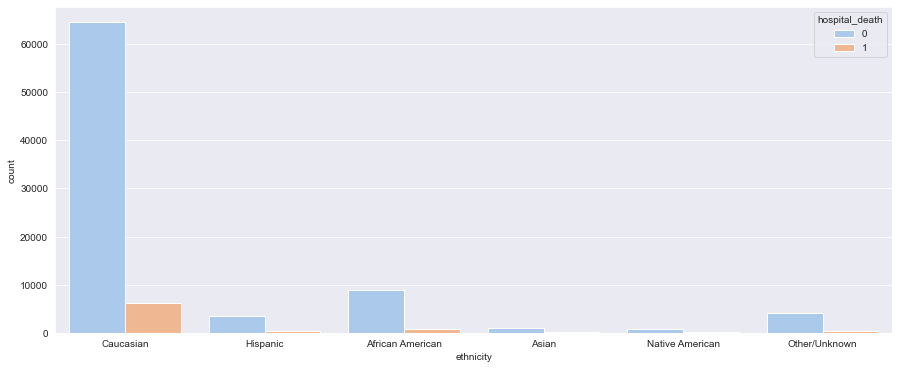

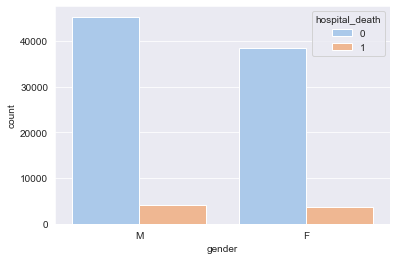

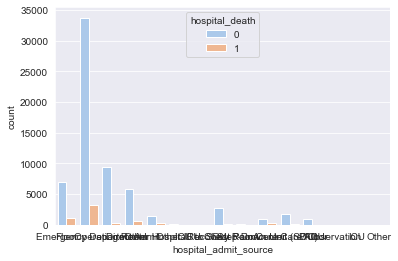

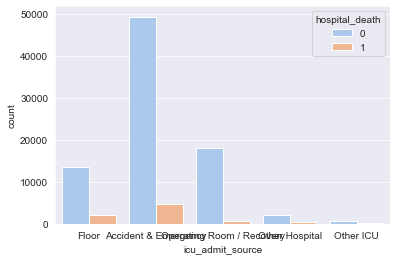

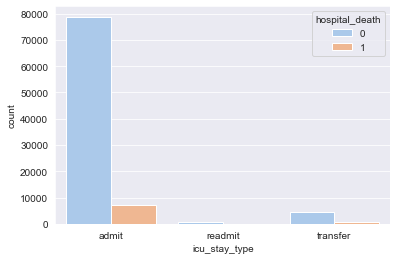

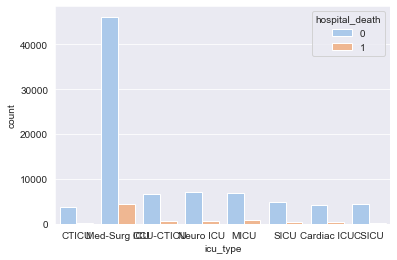

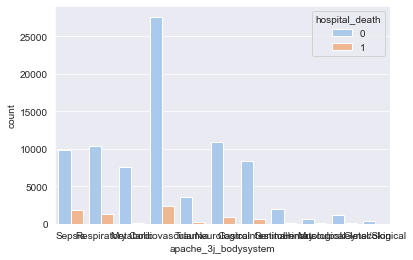

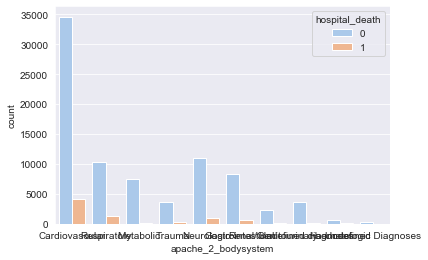

In [10]:
plt.figure(figsize=(15,6))
for item in df.select_dtypes(include='object').columns:
    sns.countplot(x=df[item], hue=df['hospital_death'], palette='pastel')
    plt.show()

<AxesSubplot:>

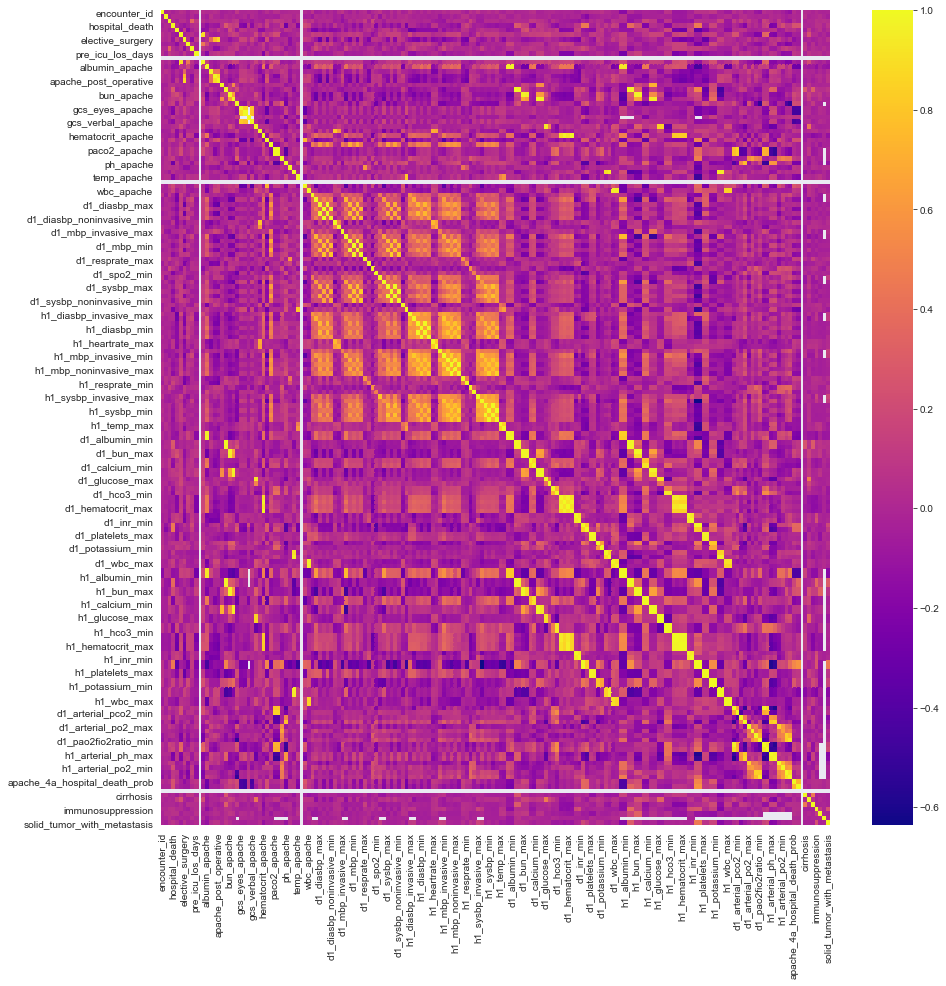

In [11]:
plt.figure(figsize=(15,15))
sns.heatmap(df[:1000].corr(), cmap='plasma')

In [12]:
df[:10000].corr()['hospital_death'].sort_values(ascending=False)[1:]

d1_lactate_min                   0.396376
d1_lactate_max                   0.380037
h1_lactate_min                   0.342300
h1_lactate_max                   0.339592
apache_4a_hospital_death_prob    0.291685
                                   ...   
gcs_eyes_apache                 -0.230128
h1_albumin_min                  -0.236849
h1_albumin_max                  -0.236919
gcs_motor_apache                -0.266902
readmission_status                    NaN
Name: hospital_death, Length: 177, dtype: float64

In [13]:
df['readmission_status'].value_counts()

0    91713
Name: readmission_status, dtype: int64

<AxesSubplot:xlabel='age', ylabel='Count'>

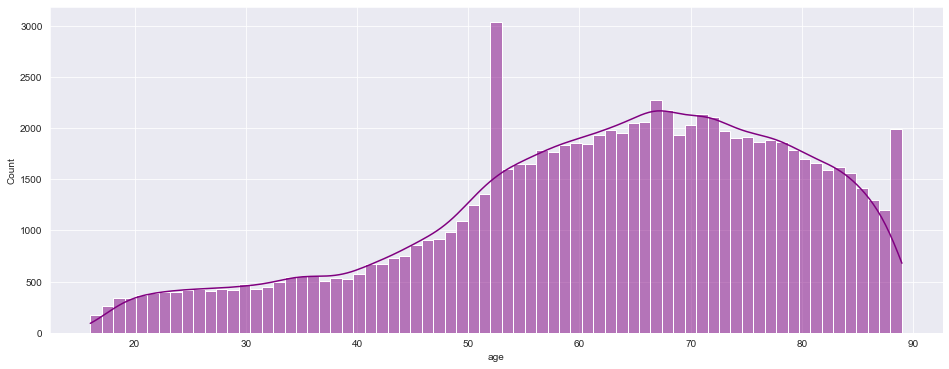

In [14]:
plt.figure(figsize=(16, 6))
sns.histplot(df['age'], kde=True, color='purple')

<AxesSubplot:xlabel='bmi', ylabel='Count'>

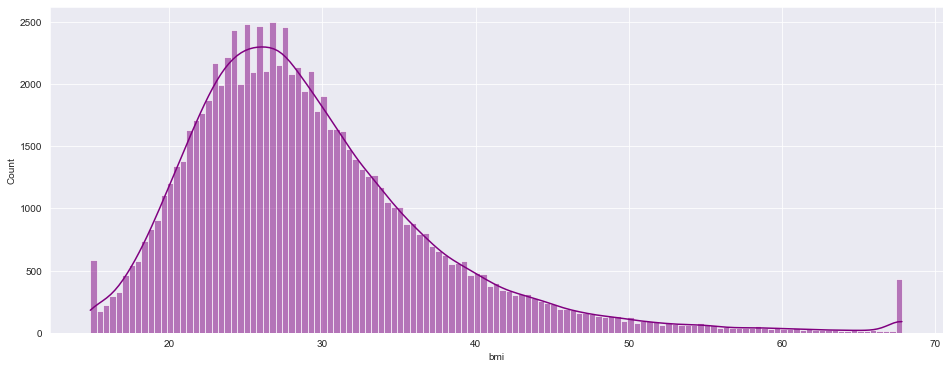

In [15]:
plt.figure(figsize=(16, 6))
sns.histplot(df['bmi'], kde=True, color='purple')

## Preprocessing

In [16]:
df.drop(['encounter_id', 'patient_id', 'hospital_id', 'readmission_status', 'd1_hco3_min', 'd1_hematocrit_max'], axis=1, inplace=True)

In [17]:
df = df.dropna(thresh=df.shape[0]*0.7,how='all',axis=1)

In [18]:
df.head()

,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,0,68.0,22.73,0,Caucasian,M,180.3,Floor,Floor,92,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,0,77.0,27.42,0,Caucasian,F,160.0,Floor,Floor,90,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,0,25.0,31.95,0,Caucasian,F,172.7,Emergency Department,Accident & Emergency,93,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
3,0,81.0,22.64,1,Caucasian,F,165.1,Operating Room,Operating Room / Recovery,92,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
4,0,19.0,NaN,0,Caucasian,M,188.0,NaN,Accident & Emergency,91,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma


In [19]:
df.isna().sum()[df.isna().sum() == 0]

hospital_death           0
elective_surgery         0
icu_id                   0
icu_stay_type            0
icu_type                 0
pre_icu_los_days         0
apache_post_operative    0
dtype: int64

### Very few columns with 0 null values implies that most of the columns have null data present in them. Thus, using dropna is not smart as it will take away from the already majorly imbalanced target column

### Imputation

In [20]:
# imputer.fit_transform(df)

In [21]:
# should take under 20 seconds
df = df.ffill(axis='columns')
df = df.convert_dtypes()

In [22]:
# df_new = imputer.fit_transform(df.select_dtypes(exclude='object'))

### Encoding

In [23]:
df.dtypes[df.dtypes == 'object']

ethnicity                object
gender                   object
height                   object
hospital_admit_source    object
icu_admit_source         object
apache_3j_bodysystem     object
apache_2_bodysystem      object
dtype: object

In [24]:
df_no_uint8 = df.select_dtypes(include='uint8').astype(str).astype(int)

In [25]:
df = pd.concat([df.select_dtypes(exclude='uint8'), df_no_uint8], axis=1)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Columns: 106 entries, hospital_death to apache_2_bodysystem
dtypes: Float64(88), Int64(9), object(7), string(2)
memory usage: 82.7+ MB


In [27]:
df = pd.concat([df.drop('ethnicity', axis=1), pd.get_dummies(df['ethnicity'])], axis=1)
df = pd.concat([df.drop('gender', axis=1), pd.get_dummies(df['gender'])], axis=1)
df = df.select_dtypes(exclude='object')

In [28]:
df.drop(['icu_id', 'icu_stay_type', 'icu_type'], axis=1, inplace=True)
df.head()

,hospital_death,age,bmi,elective_surgery,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,...,Hispanic,Native American,Other/Unknown,0,African American,Caucasian,F,Hispanic,M,Other/Unknown
0,0,68,22.73,0,0.541667,73.9,113.0,502.01,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,77,27.42,0,0.927778,70.2,108.0,203.01,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,25,31.95,0,0.000694,95.3,122.0,703.03,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,81,22.64,1,0.000694,61.7,203.0,1206.03,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,19,19.0,0,0.073611,0.073611,119.0,601.01,0,0,...,0,0,0,0,0,0,0,0,1,0


## Model training

In [29]:
X = df.drop('hospital_death', axis=1).values
y = df['hospital_death'].values

In [30]:
type(X)

numpy.ndarray

In [31]:
print(X.shape)
print(y.shape)

(91713, 110)
(91713,)


In [32]:
model = Sequential()

model.add(Dense(12, input_dim=110, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                1332      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                130       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 1,559
Trainable params: 1,559
Non-trainable params: 0
_________________________________________________________________


In [33]:
X = np.asarray(X).astype(np.float32)
y = np.asarray(y).astype(np.float32)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

In [34]:
early_stop = EarlyStopping(monitor='val_loss', patience=15, mode='min', verbose=1)

In [35]:
model.fit(X_train, y_train, epochs=300, batch_size=64, callbacks=[early_stop], validation_data=(X_test, y_test))

Epoch 1/300
961/961 [==============================] - 3s 2ms/step - loss: 0.3524 - accuracy: 0.9083 - val_loss: 0.2731 - val_accuracy: 0.9135
Epoch 2/300
961/961 [==============================] - 2s 2ms/step - loss: 0.2665 - accuracy: 0.9137 - val_loss: 0.2521 - val_accuracy: 0.9152
Epoch 3/300
961/961 [==============================] - 2s 2ms/step - loss: 0.2494 - accuracy: 0.9150 - val_loss: 0.2567 - val_accuracy: 0.9166
Epoch 4/300
961/961 [==============================] - 1s 2ms/step - loss: 0.2413 - accuracy: 0.9155 - val_loss: 0.2329 - val_accuracy: 0.9169
Epoch 5/300
961/961 [==============================] - 1s 2ms/step - loss: 0.2366 - accuracy: 0.9164 - val_loss: 0.2299 - val_accuracy: 0.9161
Epoch 6/300
961/961 [==============================] - 1s 1ms/step - loss: 0.2339 - accuracy: 0.9165 - val_loss: 0.2288 - val_accuracy: 0.9196
Epoch 7/300
961/961 [==============================] - 1s 1ms/step - loss: 0.2312 - accuracy: 0.9173 - val_loss: 0.2274 - val_accuracy: 0.9184

Epoch 58/300
961/961 [==============================] - 2s 2ms/step - loss: 0.2154 - accuracy: 0.9216 - val_loss: 0.2172 - val_accuracy: 0.9211
Epoch 59/300
961/961 [==============================] - 2s 2ms/step - loss: 0.2155 - accuracy: 0.9219 - val_loss: 0.2260 - val_accuracy: 0.9204
Epoch 60/300
961/961 [==============================] - 1s 2ms/step - loss: 0.2154 - accuracy: 0.9219 - val_loss: 0.2243 - val_accuracy: 0.9216
Epoch 61/300
961/961 [==============================] - 2s 2ms/step - loss: 0.2158 - accuracy: 0.9216 - val_loss: 0.2195 - val_accuracy: 0.9205
Epoch 62/300
961/961 [==============================] - 2s 2ms/step - loss: 0.2149 - accuracy: 0.9220 - val_loss: 0.2121 - val_accuracy: 0.9236
Epoch 63/300
961/961 [==============================] - 2s 2ms/step - loss: 0.2152 - accuracy: 0.9217 - val_loss: 0.2128 - val_accuracy: 0.9232
Epoch 64/300
961/961 [==============================] - 2s 2ms/step - loss: 0.2155 - accuracy: 0.9220 - val_loss: 0.2142 - val_accuracy:

In [36]:
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

2867/2867 [==============================] - 2s 847us/step - loss: 0.2123 - accuracy: 0.9228
Accuracy: 92.28
